In [35]:
import numpy as np
import scipy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

Wir wollen die vorprogrammierte SVM aus sklearn ausprobieren.
Dafür erstellen wir linear trennbare Toydaten in $mathbb{R}^2$

In [197]:
def initialize(l,n):
    data = 2*np.random.rand(l,n)-1  #create random data points uniformly distributed over [-1,1]^n
    rand_direction = np.random.rand(n)-0.5 #direction of seperating hyperplane
    rand_transition = 0.2*np.random.random() #transition of seperating hyperplane
    labels = np.array([np.dot(i,rand_direction) > rand_transition for i in data])
    return data, labels, rand_direction, rand_transition

[ 1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1]


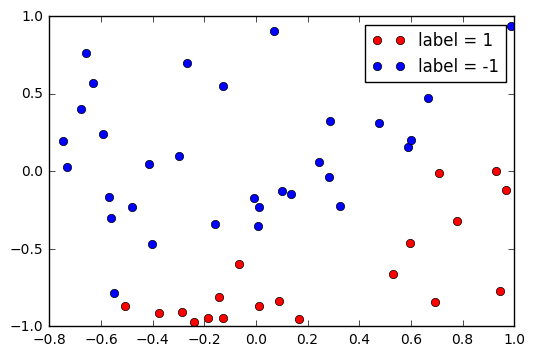

In [223]:
# fix random seed for reproducibility
seed = 2
np.random.seed(seed)
example_data, example_labels, example_rand_direction, example_rand_transition = initialize(50, 2)
example_data, example_labels, example_rand_direction, example_rand_transition
label1 = example_data[example_labels]
label0 = np.array(example_data[~example_labels])
#replace 0-labels with -1
example_labels = np.array([1 if x == True else -1 for x in example_labels])
fig1 = plt.figure()
p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])
print(example_labels)

## Linear Kernel

In [224]:
C = 0.1
my_svm = sklearn.svm.SVC(C=C, kernel='linear')
my_svm.fit(example_data, example_labels)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

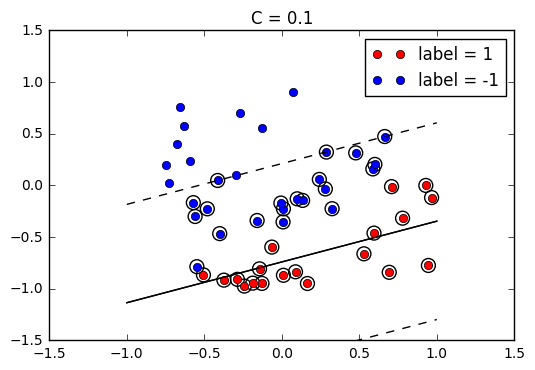

In [225]:
#get seperating hyperplane
w = my_svm.coef_[0]
m = -w[0] / w[1]   #Steigung der Funktionsgleichung, die die decision boundary beschreibt
x = np.linspace(-1, 1)
b = my_svm.intercept_[0]   #transition of hyperplane
y = m * x - b / w[1]

fig5 = plt.figure()
plt.plot(x, y, 'k-')
p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])

#get margin
margin = 1 / np.linalg.norm(w)
#lower_margin = y + m * margin
#upper_margin = y - m * margin
lower_margin = y + np.sqrt(m**2+1)* margin
upper_margin = y - np.sqrt(m**2+1) * margin

plt.plot(x, y, 'k-', x, lower_margin, 'k--', x,upper_margin, 'k--')

#get support vectors
supp_vectors = my_svm.support_vectors_
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))

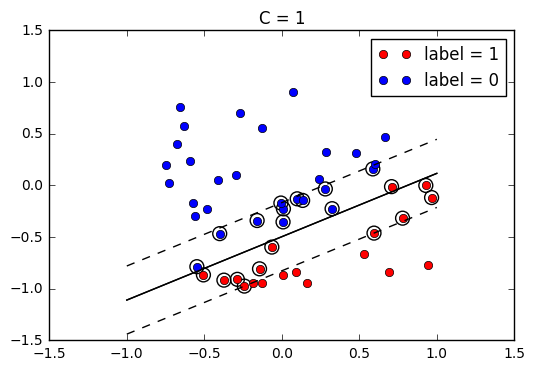

In [82]:
fig2

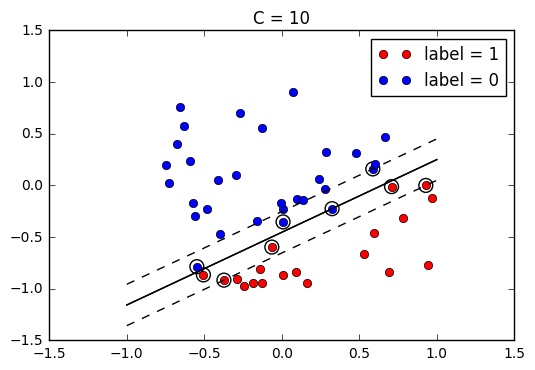

In [85]:
fig3

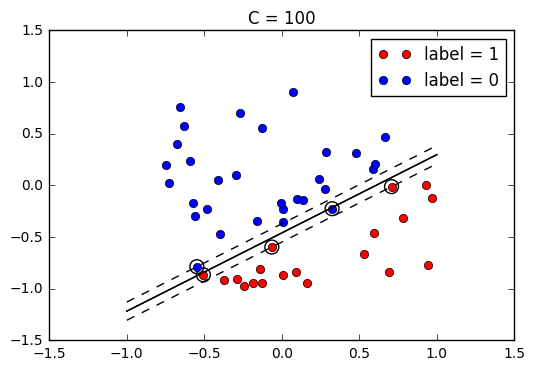

In [90]:
fig4

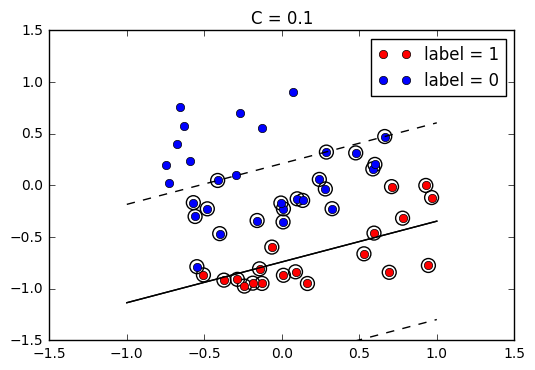

In [91]:
fig5

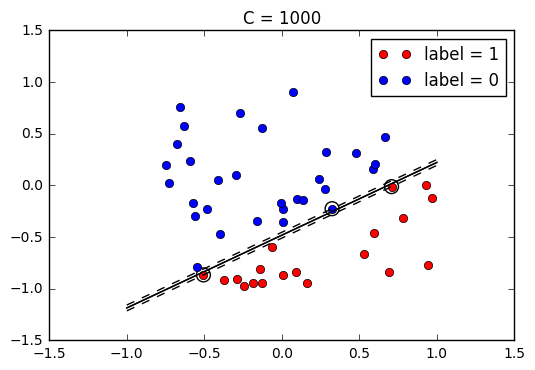

In [95]:
fig6

Beobachtung: Großes C führt zu schmaler Margin mit wenigen Support Vektoren aber ggf Overfitting, da Trainingsdaten innerhalb der Margin hart bestraft werden.

## Gausskernel

In [227]:
def gaussian_kernel(x, y, sigma):
    return np.exp(-sigma*np.linalg.norm(x-y))

In [263]:
C = 10000
gamma = 10.
my_svm = sklearn.svm.SVC(C=C, kernel='rbf', gamma=gamma)
my_svm.fit(example_data, example_labels);

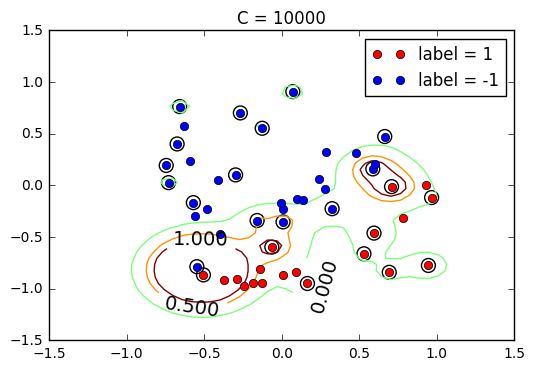

In [264]:
#get decision function
a = my_svm.dual_coef_
b = my_svm.intercept_[0]   #transition of hyperplane
supp_vectors = my_svm.support_vectors_
supp_indices = my_svm.support_   #indices of support vectors
atimeslabels = np.multiply(a, example_labels[supp_indices])

def decision_function(x):
    k = np.array([gaussian_kernel(i, x, gamma) for i in example_data[supp_indices]])
    return np.dot(atimeslabels, k) + b

x = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, x)
Z = np.array([[decision_function(np.array([xi, xj])) for xi in x] for xj in x])
Z = np.reshape(Z, (np.shape(Z)[0], np.shape(Z)[1]))
gaussfig1 = plt.figure()
CS = plt.contour(X, Y, Z, levels = [-1, 0, 0.5, 1])
plt.clabel(CS, colors = 'k', fontsize=14)

p1, = plt.plot(label1[:,0], label1[:,1], 'ro', label = 'label = 1')
p2, = plt.plot( label0[:,0], label0[:,1], 'o', label = 'label = -1')
legend = plt.legend(handles = [p1, p2])
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))

'''
fig5 = plt.figure()
plt.plot(x, y, 'k-')

#get margin
margin = 1 / np.linalg.norm(w)
#lower_margin = y + m * margin
#upper_margin = y - m * margin
lower_margin = y + np.sqrt(m**2+1)* margin
upper_margin = y - np.sqrt(m**2+1) * margin

plt.plot(x, y, 'k-', x, lower_margin, 'k--', x,upper_margin, 'k--')

#get support vectors
supp_vectors = my_svm.support_vectors_
plt.scatter(supp_vectors[:,0], supp_vectors[:,1], s=100, facecolors = 'none')

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title('C = '+str(C))''';

(50, 50)

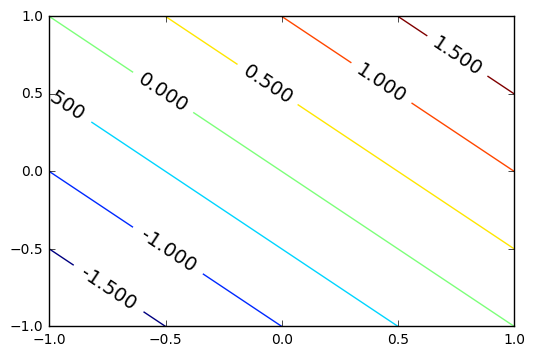

In [178]:
x = np.linspace(-1, 1)
X, Y = np.meshgrid(x, x)
Z = X+Y
P= plt.contour(X, Y, Z)
plt.clabel(P, colors = 'k', fontsize=14)

np.shape(Z)

In [260]:
example_labels[supp_indices], supp_indices

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1]),
 array([12, 13, 18, 23, 24, 26, 29, 35, 41, 49,  8,  9, 15, 28, 31, 44]))